In [3]:
#multi class perceptron for non linear 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#class 1 data
df=pd.read_csv("Clas1_.csv")
df.head(5)

,X,Y
0,0.194597,0.479090
1,0.136626,0.540135
2,1.155159,0.982728
3,1.710516,1.021271
4,1.943185,0.487639


In [5]:
#class 2 data
df0=pd.read_csv("Clas2_.csv")
df0.head(5)

,X,Y
0,1.351678,-0.442217
1,-1.088515,-1.026552
2,1.045225,-0.998472
3,0.980179,-0.692945
4,1.006940,-0.864976


In [6]:
#class1 adding 1
l1=len(df[df.columns[0]].tolist())
print(l1)
df['Z']=pd.Series(1,index=np.arange(l1))
df.head(5)

500


,X,Y,Z
0,0.194597,0.479090,1
1,0.136626,0.540135,1
2,1.155159,0.982728,1
3,1.710516,1.021271,1
4,1.943185,0.487639,1


In [7]:
#adding of 1 in class2
l2=len(df0[df0.columns[0]].tolist())
df0['Z']=pd.Series(1,index=np.arange(l2))
df0.head(5)
df1=df0

In [8]:
#training data of class1
df2=df.sample(frac=.80)
df2.head(5)

,X,Y,Z
264,2.311646,0.262782,1
13,0.327137,0.794693,1
401,0.063954,0.507996,1
136,1.041385,0.932117,1
393,-0.057476,0.173999,1


In [9]:
#test data of class1
ind1=set(df.index.values)
ind2=set(df2.index.values)
ind3=ind1.symmetric_difference(ind2)
df4=df.loc[ind3]
df4.head(5)

,X,Y,Z
0,0.194597,0.479090,1
8,2.279587,0.582003,1
12,1.277598,1.106632,1
17,1.779713,0.786713,1
24,-0.050420,0.222452,1


In [10]:
#training data of class 2
df3=df1.sample(frac=.80)
df3.head(5)

,X,Y,Z
391,0.883241,-0.852910,1
347,0.952042,-1.050840,1
179,0.495976,-1.173666,1
100,-0.098625,-1.366962,1
34,1.382886,-0.166689,1


In [11]:
#test data of class2
ind1_=set(df0.index.values)
ind2_=set(df3.index.values)
ind3_=ind1_.symmetric_difference(ind2_)
df5=df0.loc[ind3_]
df5.head(5)


,X,Y,Z
5,1.213139,-0.286126,1
7,-1.321881,-0.299018,1
8,1.381589,-0.012717,1
9,-1.297866,-0.546338,1
19,0.514502,-1.094097,1


In [12]:
#class 3 data
df6=pd.read_csv("Clas3_.csv")
df6.head(5)

,X,Y
0,-1.347189,4.761221
1,-0.979618,-5.009459
2,3.988748,1.174247
3,2.879166,-1.857395
4,3.698035,0.763359


In [13]:
# adding of 1 in class 3
l3=len(df6[df6.columns[1]].tolist())
print(l3)
df6['Z']=pd.Series(1,index=np.arange(l3))
df6

1000


,X,Y,Z
0,-1.347189,4.761221,1
1,-0.979618,-5.009459,1
2,3.988748,1.174247,1
3,2.879166,-1.857395,1
4,3.698035,0.763359,1
...,...,...,...
995,3.908640,-0.042239,1
996,4.151076,2.704701,1
997,-0.485275,3.388871,1
998,-3.299943,-3.873175,1


In [14]:
#training data class 3
import pandas as pd
df8=df6.sample(frac=.80)
df8.head(5)

,X,Y,Z
501,-3.273686,-2.633019,1
548,4.368364,-1.489676,1
869,4.095345,2.781576,1
759,-3.242479,1.183234,1
923,-4.535511,-0.676588,1


In [15]:
#test data class 3
ind1_=set(df6.index.values)
ind2_=set(df8.index.values)
ind3_=ind1_.symmetric_difference(ind2_)
df10=df6.loc[ind3_]
df10.head(5)

,X,Y,Z
5,-0.568911,3.486757,1
7,3.484859,0.919356,1
8,3.911373,-0.555528,1
22,1.523296,3.824777,1
27,-2.266365,-3.177301,1


In [16]:
# negative class 3
df7=-df8
df7.head(5)

,X,Y,Z
501,3.273686,2.633019,-1.0
548,-4.368364,1.489676,-1.0
869,-4.095345,-2.781576,-1.0
759,3.242479,-1.183234,-1.0
923,4.535511,0.676588,-1.0


In [17]:
# combining classs 1,2
D12={}
lst=['X','Y','Z']
for k in range(3):
    lst1=df2[df2.columns[k]].tolist()+df3[df3.columns[k]].tolist()
    D12[lst[k]]=lst1
Ds12=pd.DataFrame(D12)   
Ds12.tail(5)

,X,Y,Z
795,0.222289,-1.321226,1
796,0.363997,-1.316928,1
797,0.454761,-1.265353,1
798,1.427746,-0.456738,1
799,1.278255,-0.419773,1


In [18]:
# weight vector for class 1,2
w1=np.array([3,4,-10])
n=800
i=0
count1=0
while i<n:
    count1=count1+1
    s1=np.dot(w1,Ds12.loc[i])
    if s1<0:
        w1=w1+10*Ds12.loc[i]
        i=0
    else:
        i=i+1
print(w1)
count1

X    10.19290
Y     4.57439
Z    30.00000
dtype: float64


1289

In [19]:
#weight vector for class 2 and 3
D23={}
lst=['X','Y','Z']
df9=-df3
for k in range(3):
    lst1=df9[df9.columns[k]].tolist()+df7[df7.columns[k]].tolist()
    D23[lst[k]]=lst1
Ds23=pd.DataFrame(D23)   
Ds23.head(5)

,X,Y,Z
0,-0.883241,0.852910,-1.0
1,-0.952042,1.050840,-1.0
2,-0.495976,1.173666,-1.0
3,0.098625,1.366962,-1.0
4,-1.382886,0.166689,-1.0


In [20]:
#weigt vector 2 and 3
w2=np.array([3,-8,5])
n=1200
i=0
count2=0
while i<n:
    count2=count2+1
    s2=np.dot(w2,Ds23.loc[i])
    if s2<0:
        w2=w2+5*Ds23.loc[i]
        i=0
    else:
        i=i+1
print(w2)
count2

X     0.015325
Y     1.175025
Z   -10.000000
dtype: float64


1211

In [21]:
# combining classs 1,3
D13={}
lst=['X','Y','Z']
for k in range(3):
    lst1=df2[df2.columns[k]].tolist()+df7[df7.columns[k]].tolist()
    D13[lst[k]]=lst1
Ds13=pd.DataFrame(D13)   
Ds13.tail(5)

,X,Y,Z
1195,0.744804,-3.945635,-1.0
1196,-0.436936,-4.593619,-1.0
1197,3.930769,2.491670,-1.0
1198,-3.033113,-2.305494,-1.0
1199,-0.237472,3.646054,-1.0


In [22]:
#weigt vector 1and 3
w3=np.array([3,-8,5])
n=200
i=0
count3=0
while i<n:
    count3=count3+1
    s2=np.dot(w3,Ds13.loc[i])
    if s2<0:
        w3=w3+5*Ds13.loc[i]
        i=0
    else:
        i=i+1
print(w3)
count3

X     4.635685
Y    -4.026535
Z    10.000000
Name: 1, dtype: float64


202

In [23]:
ls1=[]
ls1.append(df5[df5.columns[0]].min(axis=0))
ls1.append(df4[df4.columns[0]].min(axis=0))
ls1.append(df10[df10.columns[0]].min(axis=0))
ls2=[]
ls2.append(df5[df5.columns[0]].max(axis=0))
ls2.append(df4[df4.columns[0]].max(axis=0))
ls2.append(df10[df10.columns[0]].min(axis=0))


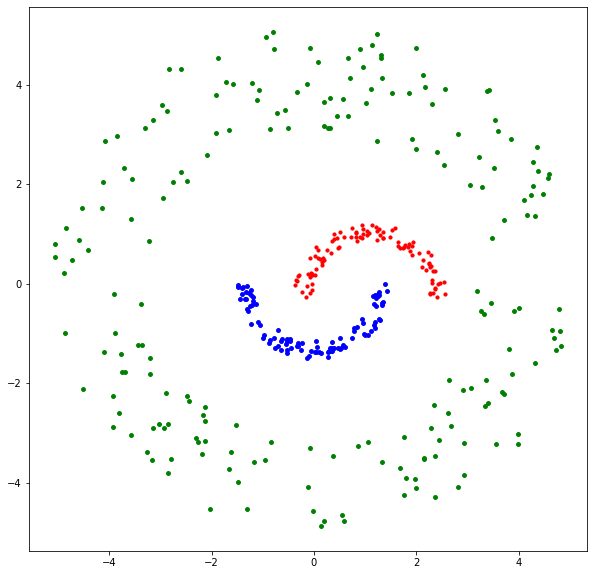

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(df4[df4.columns[0]],df4[df4.columns[1]],s=10,c='r')
plt.scatter(df5[df5.columns[0]],df5[df5.columns[1]],s=15,c='b')
plt.scatter(df10[df10.columns[0]],df10[df10.columns[1]],s=15,c='g')  
plt.show()

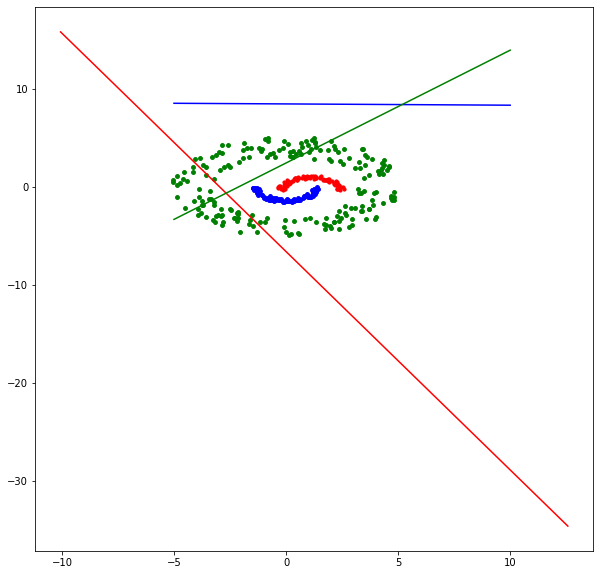

In [25]:
import matplotlib.pyplot as plt
import numpy as np
v1=min(ls1)-5
v2=max(ls2)+10
x1=np.linspace(v1,v2,150)
#----------------------------------------------------
slop1 = -(w1[0]/w1[1])  
intercept1 = -w1[2]/w1[1]
y1=[]
for i in x1:
    s1=slop1*i+intercept1
    y1.append(s1)
#------------------------------------------------
slop2 = -(w2[0]/w2[1])  
intercept2 = -w2[2]/w2[1]
v3=-5
v4=10
x2=np.linspace(v3,v4,150)
y2=[]
for k in x2:
    s2=slop2*k+intercept2
    y2.append(s2)
#------------------------------------------------------
slop3 = -(w3[0]/w3[1])  
intercept3 = -w3[2]/w3[1]
v4=-5
v5=10
x3=np.linspace(v4,v5,150)
y3=[]
for k in x3:
    s3=slop3*k+intercept3
    y3.append(s3)
#--------------------------    
plt.figure(figsize=(10,10))
plt.scatter(df4[df4.columns[0]],df4[df4.columns[1]],s=10,c='r')
plt.scatter(df5[df5.columns[0]],df5[df5.columns[1]],s=15,c='b')
plt.scatter(df10[df10.columns[0]],df10[df10.columns[1]],s=15,c='g')    
plt.plot(x1,y1,color='r')  #class 12
plt.plot(x2,y2,color='b')   #class 23
plt.plot(x3,y3,color='g')   #class 13
plt.show()